**Reference paper:**

Buhl, J., Sumpter, D. J., Couzin, I. D., Hale, J. J., Despland, E., Miller, E. R., & Simpson, S. J. (2006). From disorder to order in marching locusts. _Science, 312(5778)_, 1402-1406. DOI: [10.1126/science.1125142](https://doi.org/10.1126/science.1125142)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from utils import G, SPP

In [2]:
# Use LaTeX font in graphs
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
N = 11 # Number of locusts
deltat = 1 # Time step
L = 36 # Size of space
v0 = 1 # Initial velocity of locusts
R = 2 # Sighting radius
alpha = 0.66 # Tendency to follow neighbors
eta = 0.8 # Noise amplitude

T = 8000 # Number of time steps

In [5]:
x = np.random.uniform(0, L, N) # Initial position of locusts
v = np.random.uniform(-1, 1, N) # Initial velocity of locusts

In [8]:
order = SPP(T, 2, x, v, v0, R, eta, alpha, L) # Call SPP model

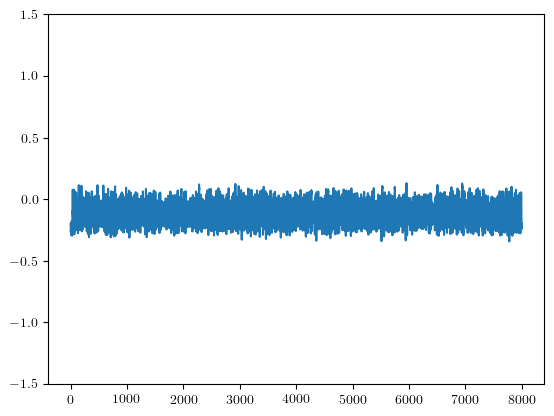

In [9]:
plt.plot(order)
plt.ylim(-1.5, 1.5)
plt.show()

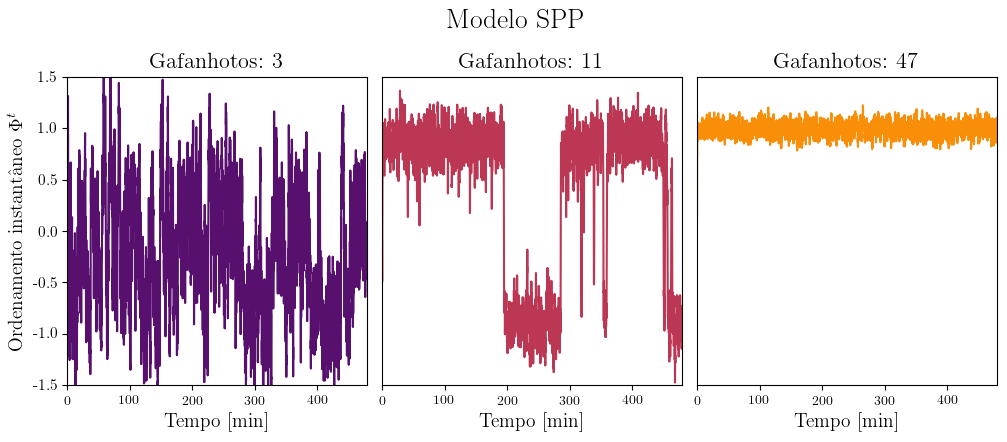

In [12]:
Ns = [3,11,47]
fig, ax = plt.subplots(1,3,figsize=(12,4))
plt.subplots_adjust(wspace=0.05)

for i in range(3):
    x = np.random.uniform(0, L, Ns[i])
    v = np.random.uniform(-1, 1, Ns[i])
    order = SPP(T, Ns[i], x, v, R, eta, alpha, L)
    
    ax[i].plot([i*60/1000 for i in range(T)], order, color = sns.color_palette('inferno', 3)[i])
    ax[i].set_title(f'Gafanhotos: {Ns[i]}', fontsize = 16)
    ax[i].set_xlabel('Tempo [min]', fontsize = 14)
    ax[i].set_ylim(-1.5, 1.5)
    ax[i].set_xlim(0, T*60/1000)
    ax[i].set_yticks(ax[i].get_yticks())
    ax[i].set_yticklabels(ax[i].get_yticks(), fontsize = 11)
    
ax[0].set_ylabel(r'Ordenamento instantâneo $\Phi^t$', fontsize = 14)
ax[0].set_yticks(ax[0].get_yticks())
ax[0].set_yticklabels(ax[0].get_yticks(), fontsize = 11)
ax[1].set_yticks([])
ax[2].set_yticks([])

fig.text(0.5, 1, r'Modelo SPP', fontsize = 20, ha = 'center')
fig.patch.set_alpha(1)
for ax in fig.axes:
    ax.patch.set_alpha(1)
    
plt.savefig('SSP_model.png', dpi = 400, bbox_inches = 'tight')
plt.show()

In [13]:
alignment = np.zeros((25,40))
total_time_mean = []
total_time_std = []

for i in tqdm(range(40)):
    N = i+1
    mean_alignment = []
    time_aligned = []
    for j in range(1000):
        x = np.random.uniform(0, L, N)
        v = np.random.uniform(-1, 1, N)
        order = SPP(T, N, x, v, R, eta, alpha, L, alpha_prob = False)
        mean_alignment.append(np.abs(np.mean(order)))
        time_aligned.append(len(np.where(np.abs(order) > 0.3)[0]))
    
    for k in range(25):
        alignment[k,i] = len(np.where((0.05*k <= np.array(mean_alignment)) & (np.array(mean_alignment) < 0.05*(k+1)))[0])/1000
        
    total_time_mean.append(np.mean(time_aligned))
    total_time_std.append(np.std(time_aligned))

100%|██████████| 40/40 [1:20:09<00:00, 120.23s/it]


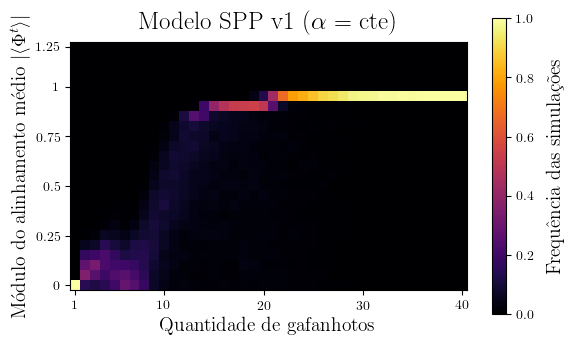

In [12]:
im = plt.imshow(alignment, origin = 'lower', cmap = 'inferno')
cbar = plt.colorbar(im, shrink = 0.8)
cbar.ax.set_ylabel('Frequência das simulações', fontsize = 14, labelpad = 10)
plt.yticks([0,5,10,15,20,24], labels = [0,0.25,0.5,0.75,1,1.25])
plt.xticks([0,9,19,29,39], labels = [1,10,20,30,40])
plt.xlabel('Quantidade de gafanhotos', fontsize = 14)
plt.ylabel(r'Módulo do alinhamento médio $\left| \left \langle \Phi^t \right \rangle \right|$',
           fontsize = 14)
plt.title(r'Modelo SPP v1 ($\alpha$ = cte)', fontsize = 18, pad = 10)
plt.savefig('Mean_alignment.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [14]:
alignment_v2 = np.zeros((25,40))
total_time_mean_v2 = []
total_time_std_v2 = []

for i in tqdm(range(40)):
    N = i+1
    mean_alignment = []
    time_aligned = []
    for j in range(1000):
        x = np.random.uniform(0, L, N)
        v = np.random.uniform(-1, 1, N)
        order = SPP(T, N, x, v, R, eta, alpha, L, alpha_prob = True)
        mean_alignment.append(np.abs(np.mean(order)))
        time_aligned.append(len(np.where(np.abs(order) > 0.3)[0]))
    
    for k in range(25):
        alignment_v2[k,i] = len(np.where((0.05*k <= np.array(mean_alignment)) & (np.array(mean_alignment) < 0.05*(k+1)))[0])/1000
        
    total_time_mean_v2.append(np.mean(time_aligned))
    total_time_std_v2.append(np.std(time_aligned))

100%|██████████| 40/40 [33:47<00:00, 50.69s/it] 


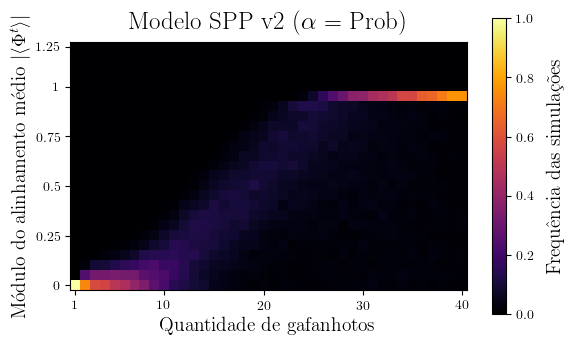

In [20]:
im = plt.imshow(alignment_v2, origin = 'lower', cmap = 'inferno')
cbar = plt.colorbar(im, shrink = 0.8)
cbar.ax.set_ylabel('Frequência das simulações', fontsize = 14, labelpad = 10)
plt.yticks([0,5,10,15,20,24], labels = [0,0.25,0.5,0.75,1,1.25])
plt.xticks([0,9,19,29,39], labels = [1,10,20,30,40])
plt.xlabel('Quantidade de gafanhotos', fontsize = 14)
plt.ylabel(r'Módulo do alinhamento médio $\left| \left \langle \Phi^t \right \rangle \right|$',
           fontsize = 14)
plt.title(r'Modelo SPP v2 ($\alpha$ = Prob)', fontsize = 18, pad = 10)
# plt.savefig('Mean_alignment_v2.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [15]:
total_time_mean = np.array(total_time_mean)
total_time_std = np.array(total_time_std)
total_time_mean_v2 = np.array(total_time_mean_v2)
total_time_std_v2 = np.array(total_time_std_v2)

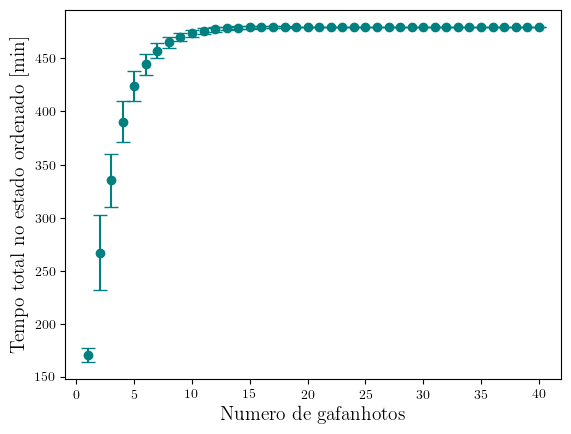

In [17]:
plt.scatter([i+1 for i in range(40)], total_time_mean*60/1000, color = 'teal',
           label = r'SPP-$\alpha_c$')
plt.errorbar([i+1 for i in range(40)], total_time_mean*60/1000,
             yerr = 2*total_time_std*60/1000, fmt = 'none', capsize = 5, color = 'teal')

# plt.scatter([i+1 for i in range(40)], total_time_mean_v2*60/1000, color = 'crimson',
#            label = r'SPP-$\alpha_p$')
# plt.errorbar([i+1 for i in range(40)], total_time_mean_v2*60/1000,
#              yerr = total_time_std_v2*60/1000, fmt = 'none', capsize = 5, color = 'crimson')
plt.xlabel('Numero de gafanhotos', fontsize = 14)
plt.ylabel('Tempo total no estado ordenado [min]', fontsize = 14)
# plt.legend(loc = 'lower right', fontsize = 12)
plt.savefig('Total_time_aligned.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [50]:
# Datapoints from figures from paper in references

data_3c_x = np.round(np.array([2.095,3.277,3.389,3.782,4.150,4.711,4.872,5.040,5.577,7.621,7.950,8.363,
                      8.505,9.177,10.328,12.022,13.192,12.754,13.417,17.727,18.965,21.525,
                      22.835,24.906,28.761,40.768,40.883,47.192,62.125,60.937,3.038,11.901,
                      10.550,10.410,8.403,7.651,5.549,4.919,3.120,2.693,6.343,2.766,2.485]),0)
data_3c_y = np.array([36.727,21.479,35.654,44.666,31.728,53.606,45.637,33.790,29.734,23.651,
                      15.723,27.644,19.718,7.783,25.729,19.629,15.248,1.907,27.548,6.620,11.631,
                      15.608,7.702,3.164,1.091,2.018,11.615,3.647,2.344,4.551,2.250,13.998,13.747,
                      15.865,11.393,10.081,11.969,10.131,19.707,19.724,25.711,35.594,37.723])

data_3f_x = np.round(np.array([1.961,2.976,3.896,4.965,5.836,6.952,7.848,8.859,9.866,10.696,
                               11.754,12.743,13.630,14.777,15.806,17.369,18.330,19.606,20.691,
                               22.132,23.995,24.984,26.367,28.203,30.576,33.149,34.983,36.919,
                               39.490,42.813,46.416,50.322,54.556,57.575]),0)
data_3f_y = np.array([46.277,63.564,48.936,33.245,23.404,16.223,11.436,7.979,5.585,4.255,3.191,
                      2.660,1.862,1.596,1.596,1.596,1.330,1.330,1.330,1.330,1.064,1.064,1.064,
                      1.064,1.064,1.064,1.064,1.064,1.064,1.064,1.064,1.064,1.064,1.064])
data_3f_y_low = np.concatenate((np.array([38.298,56.649,42.287,27.660,18.351,11.968,7.979,4.787,
                                          3.191,2.394,1.596,1.330,1.064,0.798,0.798,0.532,0.532]),
                                [0 for i in range(34-17)]))
data_3f_y_high = np.concatenate(([53.989,70.479,55.851,39.628,29.255,21.277,15.160,11.436,8.245,
                                  6.383,5.053,3.989,3.457,2.660,2.660,2.394,2.128,1.862,1.862,
                                  1.862,1.596], [1.5 for i in range(34-21)]))

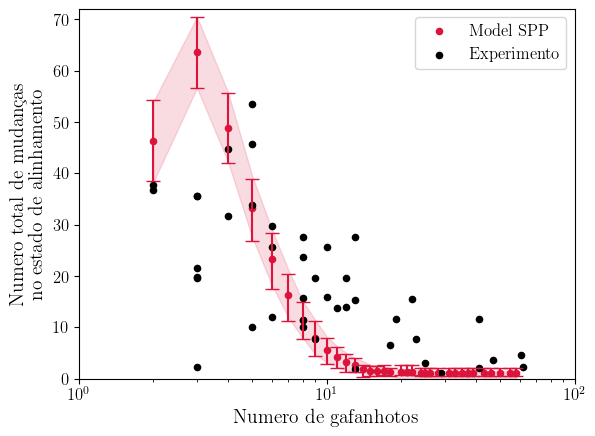

In [60]:
plt.scatter(data_3f_x, data_3f_y, s = 20, color = 'crimson', label = 'Model SPP')
plt.errorbar(data_3f_x, data_3f_y, yerr = [data_3f_y_high-data_3f_y,
                                           data_3f_y-data_3f_y_low], fmt = 'none',
            capsize = 5, color = 'crimson')
plt.fill_between(data_3f_x, data_3f_y_low, data_3f_y_high, color = 'crimson', alpha = 0.15)
plt.scatter(data_3c_x, data_3c_y, s = 20, color = 'black', label = 'Experimento')
plt.xlim(1, 100)
plt.xscale('log')
plt.ylim(0, 72)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Numero de gafanhotos', fontsize = 14)
plt.ylabel('Numero total de mudanças \n no estado de alinhamento', fontsize = 14)
plt.legend(loc = 'upper right', fontsize = 12)
plt.savefig('Fig_3c&f.png', dpi = 400, bbox_inches = 'tight')
plt.show()

In [18]:
data_3b_x = np.array([2.1210,2.7240,2.8636,3.7818,4.7476,2.5651,3.1767,3.3888,4.1862,4.9264,4.2593,5.1839,
             5.7159,3.5082,3.4544,3.0827,5.0518,5.6630,6.5449,7.5699,8.2132,8.4867,8.7736,8.6408,
             7.8381,9.3888,10.4898,10.6490,10.8444,12.3530,13.8599,13.8775,12.1815,13.0369,17.7467,
             18.6397,18.0248,19.8435,22.2335,22.2945,22.6793,24.2149,24.2220,25.0482,28.5356,40.1697,
             41.4912,40.8790,48.1307,61.4961,62.3682])
data_3b_y = np.array([112.5749,209.5808,227.5449,236.5269,214.9701,304.7904,333.5329,320.9581,302.9940,294.0120,
             320.9581,329.9401,324.5509,356.8862,373.0539,382.0359,455.6886,453.8922,412.5749,385.6287,
             383.8323,385.6287,396.4072,416.1677,425.1497,441.3174,378.4431,355.0898,389.2216,382.0359,
             396.4072,419.7605,425.1497,471.8563,437.7246,439.5210,423.3533,389.2216,378.4431,428.7425,
             443.1138,446.7066,452.0958,468.2635,462.8743,444.9102,439.5210,466.4671,466.4671,468.2635,
             426.9461])

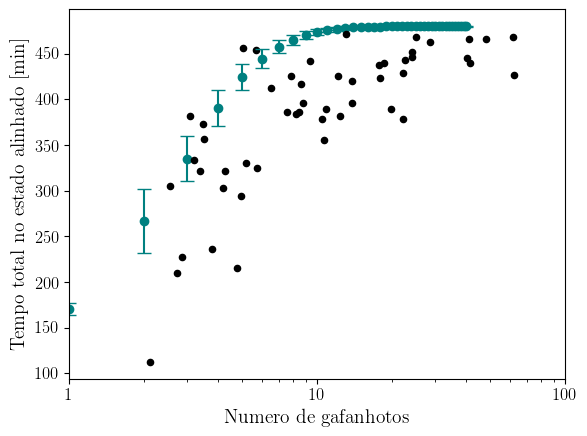

In [25]:
plt.scatter([i+1 for i in range(40)], total_time_mean*60/1000, color = 'teal',
           label = r'SPP-$\alpha_c$')
plt.errorbar([i+1 for i in range(40)], total_time_mean*60/1000,
             yerr = 2*total_time_std*60/1000, fmt = 'none', capsize = 5, color = 'teal')

# plt.scatter([i+1 for i in range(40)], total_time_mean_v2*60/1000, color = 'crimson',
#            label = r'SPP-$\alpha_p$')
# plt.errorbar([i+1 for i in range(40)], total_time_mean_v2*60/1000,
#              yerr = total_time_std_v2*60/1000, fmt = 'none', capsize = 5, color = 'crimson')
plt.scatter(data_3b_x, data_3b_y, color = 'black', s = 20)
plt.xlabel('Numero de gafanhotos', fontsize = 14)
plt.ylabel('Tempo total no estado alinhado [min]', fontsize = 14)
plt.xscale('log')
plt.xlim(1, 100)
plt.xticks([1,10,100], labels = [1,10,100], fontsize = 12)
plt.yticks(fontsize = 12)
# plt.legend(loc = 'lower right', fontsize = 12)
plt.savefig('Total_time_aligned_exp_vs_model.png', dpi = 300, bbox_inches = 'tight')
plt.show()